# RL_Navigation Results

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
PATH = "/Volumes/BC_Clutch/Dropbox/DeepRLND/rl_navigation/"
CHART_PATH = PATH + "charts/"

roll_length = 100

In [3]:
def chart_results(CHART_PATH, pklfile):
    pklpath = CHART_PATH + pklfile
    timestamp = pklpath.split(".")[-2].split("-")[-1]
    chartpath = CHART_PATH + f"NavigationTrainChart-{timestamp}.png"

    with open(pklpath, 'rb') as handle:
        results = pd.DataFrame(pickle.load(handle))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for mod in results.columns:
        scores = results[mod]['scores']
        avg_scores = []
        for i in range(1,len(scores)+1):
            start = np.max(i-roll_length,0)
            end = i
            nm = np.sum(scores[start:end])
            dn = len(scores[start:end])
            avg_scores.append(nm/dn)
        plt.plot(np.arange(len(scores)), avg_scores,label=mod)
        plt.ylabel('Score')
        plt.xlabel('Episode #')
        plt.legend()
    plt.savefig(chartpath)
    print(f"Chart saved at {chartpath}")
    plt.show()
    display(results)
    return results

/Users/brianmcmahon/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


Chart saved at /Volumes/BC_Clutch/Dropbox/DeepRLND/rl_navigation/charts/NavigationTrainChart-201811240921.png


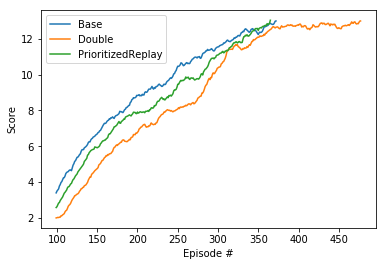

,Base,Double,PrioritizedReplay
action_size,4,4,4
eps_decay,0.995,0.995,0.995
eps_end,0.01,0.01,0.01
eps_start,0.4,0.4,0.4
max_t,1000,1000,1000
n_episodes,1000,1000,1000
scores,"[0.0, 2.0, 1.0, 0.0, 2.0, -3.0, 1.0, -1.0, 0.0...","[0.0, 0.0, 1.0, 3.0, 0.0, 0.0, 1.0, 1.0, -1.0,...","[0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, -2.0, 0.0..."
seed,0,0,0
state_size,37,37,37
train_mode,True,True,True


In [4]:
results = chart_results(CHART_PATH, "ResultDict-201811240921.pkl")

In [5]:
pklpath = CHART_PATH + "ResultDict-AllGym-201811260836.pkl"
with open(pklpath, 'rb') as handle:
    results = pickle.load(handle)
results

{'LunarLander-v2': {'Vanilla': {'scores': [-243.96862436048553,
    -108.57902077409787],
   'clocktime': 0.01},
  'Double': {'scores': [-84.58354414940162], 'clocktime': 0.01},
  'PriorityReplay': {'scores': [-138.27941090866352], 'clocktime': 0.01}},
 'CartPole-v0': {'Vanilla': {'scores': [13.0], 'clocktime': 0.0},
  'Double': {'scores': [12.0], 'clocktime': 0.0},
  'PriorityReplay': {'scores': [11.0], 'clocktime': 0.0}},
 'MountainCar-v0': {'Vanilla': {'scores': [-200.0], 'clocktime': 0.0},
  'Double': {'scores': [-200.0], 'clocktime': 0.01},
  'PriorityReplay': {'scores': [-200.0], 'clocktime': 0.01}}}

In [6]:
results.keys()

dict_keys(['LunarLander-v2', 'CartPole-v0', 'MountainCar-v0'])

In [7]:
results['LunarLander-v2']['Double']['scores']

[-84.58354414940162]

In [8]:
def chart_results2(CHART_PATH, pklfile):
    pklpath = CHART_PATH + pklfile
    timestamp = pklpath.split(".")[-2].split("-")[-1]

    with open(pklpath, 'rb') as handle:
        results = pickle.load(handle)
    for module in results.keys():
        mod_data = results[module]
        fig = plt.figure()
        ax = fig.add_subplot(111)
        for key in mod_data.keys():
            scores = mod_data[key]['scores']
            avg_scores = []
            for i in range(1,len(scores)+1):
                start = np.max(i-roll_length,0)
                end = i
                nm = np.sum(scores[start:end])
                dn = len(scores[start:end])
                avg_scores.append(nm/dn)
            plt.plot(np.arange(len(scores)), avg_scores,label=key)
            plt.ylabel('Score')
            plt.xlabel('Episode #')
            plt.title(f"{module}")
            plt.legend()
        chartpath = CHART_PATH + f"NavigationTrainChart-{timestamp}-{module}-{key}.png"
        plt.savefig(chartpath)
        print(f"Chart saved at {chartpath}")
    plt.show()   
    display(pd.DataFrame(results))
    return results

Chart saved at /Volumes/BC_Clutch/Dropbox/DeepRLND/rl_navigation/charts/NavigationTrainChart-201811260836-LunarLander-v2-PriorityReplay.png
Chart saved at /Volumes/BC_Clutch/Dropbox/DeepRLND/rl_navigation/charts/NavigationTrainChart-201811260836-CartPole-v0-PriorityReplay.png
Chart saved at /Volumes/BC_Clutch/Dropbox/DeepRLND/rl_navigation/charts/NavigationTrainChart-201811260836-MountainCar-v0-PriorityReplay.png


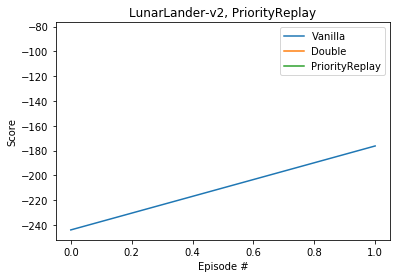

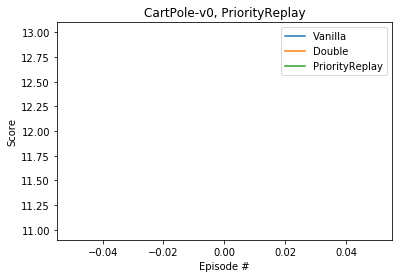

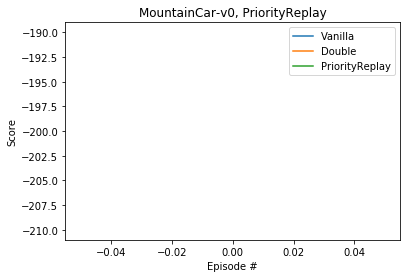

,LunarLander-v2,CartPole-v0,MountainCar-v0
Double,"{'scores': [-84.58354414940162], 'clocktime': ...","{'scores': [12.0], 'clocktime': 0.0}","{'scores': [-200.0], 'clocktime': 0.01}"
PriorityReplay,"{'scores': [-138.27941090866352], 'clocktime':...","{'scores': [11.0], 'clocktime': 0.0}","{'scores': [-200.0], 'clocktime': 0.01}"
Vanilla,"{'scores': [-243.96862436048553, -108.57902077...","{'scores': [13.0], 'clocktime': 0.0}","{'scores': [-200.0], 'clocktime': 0.0}"


In [9]:
results = chart_results2(CHART_PATH, "ResultDict-AllGym-201811260836.pkl")